In [3]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
clients = pd.read_csv("C:/Users/aldio/OneDrive/Documents/ProjetValorisationD/ProjetValorisationDonnees/Semaine6/clients.csv")
clients.head()

C:\Users\aldio\AppData\Local\Temp\ipykernel_21352\1171154030.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  clients =pd.read_csv("C:/Users/aldio/OneDrive/Documents/ProjetValorisationD/ProjetValorisationDonnees/Semaine6/clients.csv")


,idClient,prenom,nom,sexe,email,telephone,dateNaissance,profession,ville,region,mdp
0,5f10e9D33fC5f2b,Sara,Mcguire,Femme,tsharp@example.net,(971)643-6089x9160,1921-08-17,"Editor, commissioning",Shashemenē,Oromiya,n4iNrw4s3T
1,DcEFDB2D2e62bF9,Gwendolyn,Sheppard,Homme,mercadojonathan@example.com,9017807728,1915-09-25,Industrial buyer,Jasaan,Northern Mindanao,nyujgh2wdH
2,C88661E02EEDA9e,Kristine,Mccann,Femme,lindsay55@example.com,+1-607-333-9911x59088,1978-07-27,Multimedia specialist,Toshloq,Fergana,O7mo3dRp2j
3,fafF1aBDebaB2a6,Bobby,Pittman,Femme,blevinsmorgan@example.com,3739847538,1989-11-17,Planning and development surveyor,Leytonstone,England,VUFNcK4qEw
4,BdDb6C8Af309202,Calvin,Ramsey,Femme,loretta85@example.com,001-314-829-5014x1792,2017-08-31,Therapeutic radiographer,Salwá,Hawalli,z4Ll1m7ODZ


### clean

##### FAISONS UNE ANALYSE DESCRIPTIVE SUR LE DATASETS CLIENTS

### Verifions s'il y'as des valeurs Manquantes 

In [8]:
print(clients.isna().sum())

idClient         0
prenom           0
nom              0
sexe             0
email            0
telephone        0
dateNaissance    0
profession       0
ville            0
region           0
mdp              0
dtype: int64


In [9]:
clients.head

<bound method NDFrame.head of             idClient     prenom        nom   sexe  \
0    5f10e9D33fC5f2b       Sara    Mcguire  Femme   
1    DcEFDB2D2e62bF9  Gwendolyn   Sheppard  Homme   
2    C88661E02EEDA9e   Kristine     Mccann  Femme   
3    fafF1aBDebaB2a6      Bobby    Pittman  Femme   
4    BdDb6C8Af309202     Calvin     Ramsey  Femme   
..               ...        ...        ...    ...   
453  aDe216dCD496fCC     Carlos    Rowland  Homme   
454  6aa9fAac21087fC    Russell    Fleming  Femme   
455  eF8Fdbb3CA4ED41     Gloria  Dougherty  Femme   
456  Cf3E458dFEbEDBd     Justin     Burton  Homme   
457  bdaAaceBCaaA5aD     Austin   Clements  Femme   

                           email               telephone dateNaissance  \
0             tsharp@example.net      (971)643-6089x9160    1921-08-17   
1    mercadojonathan@example.com              9017807728    1915-09-25   
2          lindsay55@example.com   +1-607-333-9911x59088    1978-07-27   
3      blevinsmorgan@example.com     

#### EDA :

### AFFICHIER LES DIFFERENT COLONES DU DATASET 

In [10]:
clients.describe()

,idClient,prenom,nom,sexe,email,telephone,dateNaissance,profession,ville,region,mdp
count,458,458,458,458,458,458,458,458,458,458,458
unique,458,317,372,2,458,458,457,327,454,303,458
top,5f10e9D33fC5f2b,Tonya,Farley,Femme,tsharp@example.net,(971)643-6089x9160,1992-01-27,Therapeutic radiographer,Tapachula,England,n4iNrw4s3T
freq,1,4,3,256,1,1,2,4,2,16,1


###### Les colones 

In [11]:
print(clients)

            idClient     prenom        nom   sexe  \
0    5f10e9D33fC5f2b       Sara    Mcguire  Femme   
1    DcEFDB2D2e62bF9  Gwendolyn   Sheppard  Homme   
2    C88661E02EEDA9e   Kristine     Mccann  Femme   
3    fafF1aBDebaB2a6      Bobby    Pittman  Femme   
4    BdDb6C8Af309202     Calvin     Ramsey  Femme   
..               ...        ...        ...    ...   
453  aDe216dCD496fCC     Carlos    Rowland  Homme   
454  6aa9fAac21087fC    Russell    Fleming  Femme   
455  eF8Fdbb3CA4ED41     Gloria  Dougherty  Femme   
456  Cf3E458dFEbEDBd     Justin     Burton  Homme   
457  bdaAaceBCaaA5aD     Austin   Clements  Femme   

                           email               telephone dateNaissance  \
0             tsharp@example.net      (971)643-6089x9160    1921-08-17   
1    mercadojonathan@example.com              9017807728    1915-09-25   
2          lindsay55@example.com   +1-607-333-9911x59088    1978-07-27   
3      blevinsmorgan@example.com              3739847538    1989-11

### ETUDIONS LA DISTRUBUTION DE CERTAIN VARIABLES 

### DISTRUBUTION DU SEXE

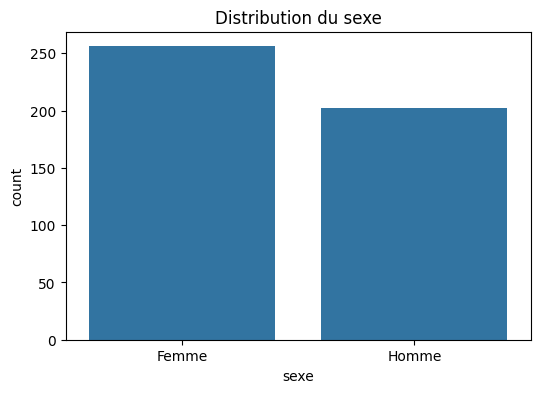

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sexe', data=clients)
plt.title('Distribution du sexe')
plt.show()

### com

#### LA DISTRIBUTION des Ages

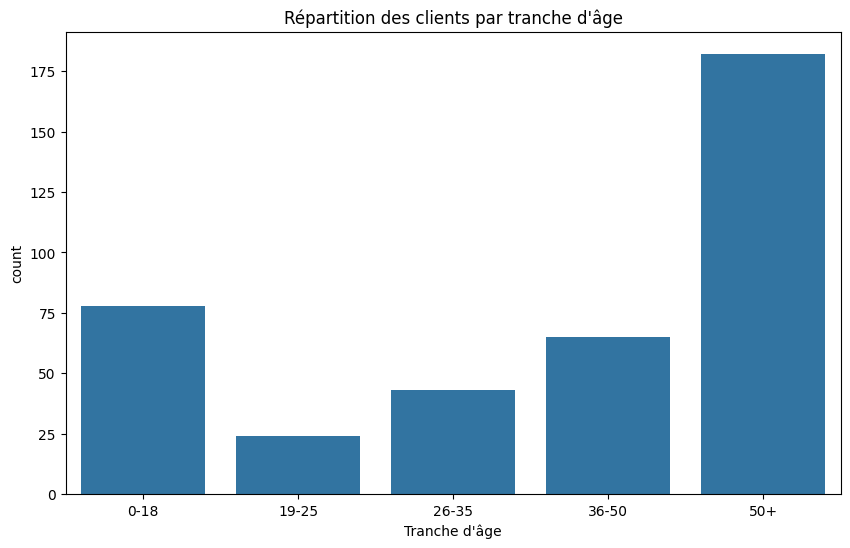

In [22]:
plt.figure(figsize=(10, 6))
bins = [0, 18, 25, 35, 50, 100]
labels = ['0-18', '19-25', '26-35', '36-50', '50+']
clients['tranche_age'] = pd.cut(clients['age'], bins=bins, labels=labels, right=False)
sns.countplot(x='tranche_age', data=clients, order=labels)
plt.title('Répartition des clients par tranche d\'âge')
plt.xlabel('Tranche d\'âge')
plt.show()
